In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris["Species"].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Scatter Plot

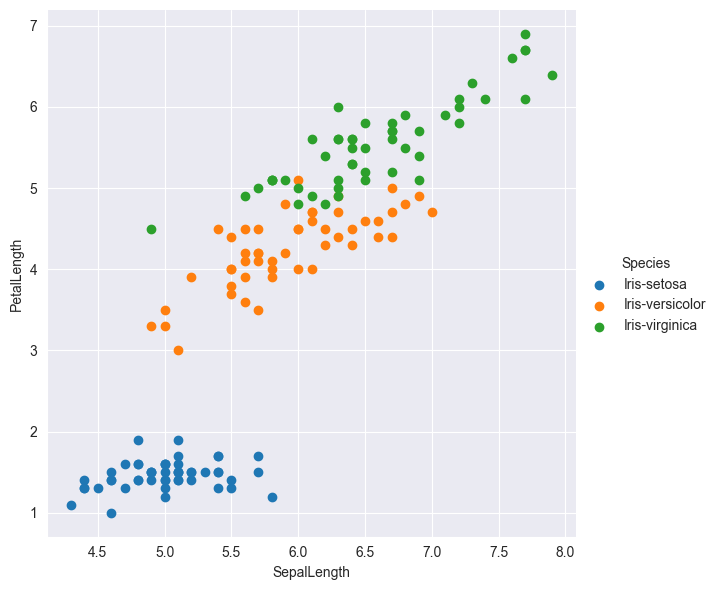

In [4]:
sns.set_style("darkgrid")
 

sns.FacetGrid(iris, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLength',
                              'PetalLength').add_legend()

In [5]:
# iris["Id"] = iris.index
# iris["ratio"] = iris["SepalLengthCm"]/iris["SepalWidthCm"]

# sns.lmplot(x="ID", y="ratio", data=iris, hue="Species", fit_reg=False, legend=False)

# plt.legend()
# plt.show()A

## Logistic Regression

Converting categorical variables into numbers

In [6]:
flower_map = {
'Iris-setosa' : 0,
'Iris-versicolor' : 1,
'Iris-virginica' : 2}
iris["Species"] = iris["Species"].map(flower_map)

In [7]:
iris.head()


,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
X = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']].values
Y = iris[['Species']].values

In [9]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X ,Y)

LogisticRegression()

In [10]:
# Accuracy

model.score(X,Y)

0.9733333333333334

In [11]:
# Predicting

expect = Y
predict = model.predict(X)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [12]:
# Summarizing 

from sklearn import metrics

print(metrics.classification_report(expect , predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [13]:
print(metrics.confusion_matrix(expect, predict))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [14]:
# Regularization

model = LogisticRegression(C = 20, penalty ='l2')
model.fit(X ,Y)

LogisticRegression(C=20)

In [15]:
model.score(X,Y)

0.98

In [16]:
# Effect of Regulatization on Classification Boundary

from sklearn import linear_model, datasets
import numpy as np

def Regularization_Logistic(Regu,type):

    # import some data to play with
    iris = datasets.load_iris()
    X = iris.data[:,:2]  # we only take the first two features.
    Y = iris.target

    h = .02  # step size in the mesh

    logreg = linear_model.LogisticRegression(C=Regu,penalty=type)

    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
     # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

    expected = Y
    predicted = logreg.predict(X)
    # summarize the fit of the model
    import sklearn.metrics
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))


In [17]:
from ipywidgets import interact

i = interact(Regularization_Logistic, Regu=(1,10000),type=['l2'])

interactive(children=(IntSlider(value=5000, description='Regu', max=10000, min=1), Dropdown(description='type'…